In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
import collections
from collections import namedtuple
import builtins
import math

# import our library
sys.path.insert(0, '../resurfemg')
import helper_functions as hf



In [66]:
#You probably want to change the name to a timestamp, and save every hour, at least. 
csv = pd.read_csv('ML_files/for_ml_csv.csv')

In [67]:
csv.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,label
0,0,0.000270,0.000127,0.000186,0.000341,0.000163,0.000243,0.000087,0.000149,0.000038,...,0.000222,0.000017,0.000168,0.000142,0.000013,0.000030,0.000006,0.000025,0.000139,exhale
1,1,0.000320,0.000283,0.000076,0.000259,0.000459,0.000356,0.000068,0.000173,0.000269,...,0.000196,0.000011,0.000021,0.000070,0.000043,0.000020,0.000017,0.000050,0.000051,exhale
2,2,0.000505,0.000575,0.000243,0.000076,0.000124,0.000049,0.000177,0.000091,0.000109,...,0.000066,0.000107,0.000094,0.000059,0.000150,0.000075,0.000091,0.000179,0.000087,exhale
3,3,0.000099,0.000830,0.000798,0.000339,0.000111,0.000404,0.000402,0.000072,0.000020,...,0.000016,0.000213,0.000122,0.000128,0.000213,0.000017,0.000217,0.000240,0.000100,exhale
4,4,0.000096,0.000393,0.000366,0.000020,0.000397,0.000308,0.000281,0.000082,0.000190,...,0.000087,0.000197,0.000169,0.000035,0.000243,0.000239,0.000034,0.000162,0.000182,exhale


In [68]:
csv['label'][0]

'exhale'

In [69]:
csv

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,label
0,0,0.000270,0.000127,0.000186,0.000341,0.000163,0.000243,0.000087,0.000149,0.000038,...,0.000222,0.000017,0.000168,0.000142,0.000013,0.000030,0.000006,0.000025,0.000139,exhale
1,1,0.000320,0.000283,0.000076,0.000259,0.000459,0.000356,0.000068,0.000173,0.000269,...,0.000196,0.000011,0.000021,0.000070,0.000043,0.000020,0.000017,0.000050,0.000051,exhale
2,2,0.000505,0.000575,0.000243,0.000076,0.000124,0.000049,0.000177,0.000091,0.000109,...,0.000066,0.000107,0.000094,0.000059,0.000150,0.000075,0.000091,0.000179,0.000087,exhale
3,3,0.000099,0.000830,0.000798,0.000339,0.000111,0.000404,0.000402,0.000072,0.000020,...,0.000016,0.000213,0.000122,0.000128,0.000213,0.000017,0.000217,0.000240,0.000100,exhale
4,4,0.000096,0.000393,0.000366,0.000020,0.000397,0.000308,0.000281,0.000082,0.000190,...,0.000087,0.000197,0.000169,0.000035,0.000243,0.000239,0.000034,0.000162,0.000182,exhale
5,5,0.000815,0.000741,0.000194,0.000030,0.000637,0.000158,0.000836,0.000076,0.000783,...,0.000053,0.000144,0.000160,0.000117,0.000033,0.000034,0.000022,0.000006,0.000073,exhale
6,6,0.000094,0.000197,0.000224,0.000090,0.000173,0.000349,0.000293,0.000082,0.000125,...,0.000107,0.000026,0.000020,0.000154,0.000163,0.000028,0.000095,0.000138,0.000125,exhale
7,7,0.000431,0.000382,0.000189,0.000191,0.000453,0.000330,0.000132,0.000181,0.000247,...,0.000110,0.000077,0.000250,0.000277,0.000103,0.000123,0.000181,0.000056,0.000043,exhale
8,8,0.000158,0.000104,0.000243,0.000434,0.000403,0.000065,0.000411,0.000349,0.000163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,exhale
9,0,0.000173,0.000116,0.000216,0.000111,0.000052,0.000139,0.000077,0.000107,0.000238,...,0.001853,0.002775,0.002134,0.003706,0.002890,0.001358,0.000257,0.002098,0.004737,inhale


In [70]:
csv['std'] = csv.std(axis=1)
csv['max'] = csv.max(axis=1)
csv.head()

C:\Users\makeda\AppData\Local\Temp\ipykernel_13536\2122691166.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  csv['std'] = csv.std(axis=1)
C:\Users\makeda\AppData\Local\Temp\ipykernel_13536\2122691166.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  csv['max'] = csv.max(axis=1)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,993,994,995,996,997,998,999,label,std,max
0,0,0.000270,0.000127,0.000186,0.000341,0.000163,0.000243,0.000087,0.000149,0.000038,...,0.000168,0.000142,0.000013,0.000030,0.000006,0.000025,0.000139,exhale,0.000098,0.00061
1,1,0.000320,0.000283,0.000076,0.000259,0.000459,0.000356,0.000068,0.000173,0.000269,...,0.000021,0.000070,0.000043,0.000020,0.000017,0.000050,0.000051,exhale,0.031603,1.00000
2,2,0.000505,0.000575,0.000243,0.000076,0.000124,0.000049,0.000177,0.000091,0.000109,...,0.000094,0.000059,0.000150,0.000075,0.000091,0.000179,0.000087,exhale,0.063210,2.00000
3,3,0.000099,0.000830,0.000798,0.000339,0.000111,0.000404,0.000402,0.000072,0.000020,...,0.000122,0.000128,0.000213,0.000017,0.000217,0.000240,0.000100,exhale,0.094817,3.00000
4,4,0.000096,0.000393,0.000366,0.000020,0.000397,0.000308,0.000281,0.000082,0.000190,...,0.000169,0.000035,0.000243,0.000239,0.000034,0.000162,0.000182,exhale,0.126424,4.00000


In [73]:
csv.loc[csv['label']== 'exhale', 'label'] = 0
csv.loc[csv['label']== 'inhale', 'label'] = 1

In [28]:
# import matplotlib.pyplot as plt
# from sklearn import svm, datasets
# from sklearn.inspection import DecisionBoundaryDisplay


# # import some data to play with
# iris = datasets.load_iris()
# # Take the first two features. We could avoid this by using a two-dim dataset
# X = iris.data[:, :2]
# y = iris.target

In [74]:
#X

In [75]:
X = csv.drop('label', axis =1)
X = X[['std','max']]
X

,std,max
0,0.000098,0.000610
1,0.031603,1.000000
2,0.063210,2.000000
3,0.094817,3.000000
4,0.126424,4.000000
5,0.158030,5.000000
6,0.189638,6.000000
7,0.221244,7.000000
8,0.413661,8.000000
9,0.000878,0.005114


In [76]:
y = csv['label']
y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
Name: label, dtype: object

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'train_test_split' is not defined

ValueError: Unknown label type: 'unknown'

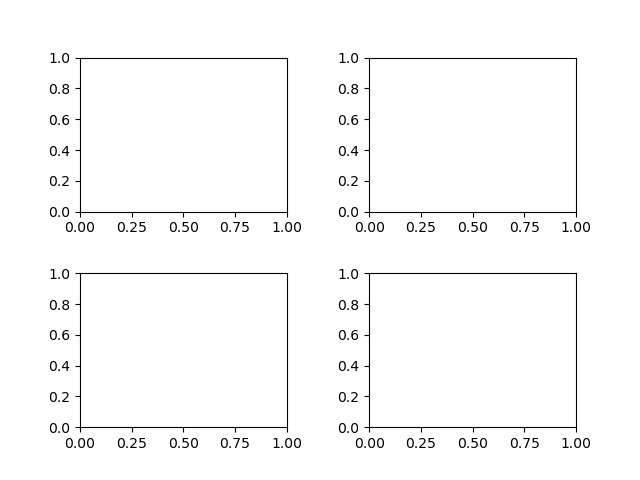

In [77]:

C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X['std'], X['max']

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel='tr',
        ylabel='try',
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()